# Fine-tune BLIP using Hugging Face `transformers`

## Set-up environment

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git@main

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-hc0ddl9x
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-hc0ddl9x
  Resolved https://github.com/huggingface/transformers.git to commit 5f97bbc12469475b347c642a0f87474ceafecf45
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 200.1/200.1 kB 5.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7.8/7.8 MB 69.1 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-4.29.0.dev0-py3-none-any.whl size=6934896 s

## Load the image captioning dataset

Let's load the image captioning dataset, you just need few lines of code for that.

In [ ]:
!gdown --id 19PNUBURH4SMwqz4KZBwnACAMeKd7q_3Q

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=19PNUBURH4SMwqz4KZBwnACAMeKd7q_3Q
To: /content/images.rar
100% 92.8M/92.8M [00:01<00:00, 56.7MB/s]


In [ ]:
!pip install unrar
!unrar x images.rar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from images.rar

Creating    images                                                    OK
Extracting  images/286655408_203755458674310_8259357321063699530_nQ9PXSSBPVX6FA8K01LJS_12c1.jpg       0%  OK 
Extracting  images/301142740_573476357797051_1615591687230486641_nRJHNPVT2TOKR05JALV16_5579.jpg       0%  OK 
Extracting  images/304932228_3273881869595933_370777674431748799_nZP25V4N8DXS3FQYMJ1TF_f0a4.jpg       1%  OK 
Extracting  images/305006898_5836158639751120_8920968241470605159_n1PPTN3THPWPNDZ54N5E3_fea7.jpg       1%  OK 
Extracting  images/305034129_472320548136479_1597431188683411331_nN575G24JVQCYWD0FRNYD_a152.jpg       1%  OK 
Extracting  images/305161652_1535167873565957_330729006261760600_n0Z24RGVLX94060KBK5EY_d59c.jpg       2%  OK 
Extractin

Let's retrieve the caption of the first example:

And the corresponding image

## Create PyTorch Dataset

The lines below are entirely copied from the original notebook!

In [ ]:
import json
import pandas as pd


with open('/content/batch3.json', 'rt', encoding='utf-8-sig') as annotations:
    coco = json.load(annotations)
anns_img = pd.json_normalize(coco['images'])
anns_cat = pd.json_normalize(coco['categories'])
anns = pd.json_normalize(coco['annotations'])

In [ ]:
anns_cat[anns_cat['id'] == 0].iloc[0]['name']

id        name
0    0        COAT
1    1      anklet
2    2    backpack
3    3         bag
4    4        belt
5    5        body
6    6        boot
7    7         bra
8    8    bracelet
9    9      chador
10  10       dress
11  11    earrings
12  12     glasses
13  13       glove
14  14         hat
15  15      hoodie
16  16      jacket
17  17    jumpsuit
18  18     luggage
19  19       manto
20  20    necklace
21  21      pancho
22  22       pants
23  23    pullover
24  24        ring
25  25       scarf
26  26       shirt
27  27        shoe
28  28      shomiz
29  29      shorts
30  30       skirt
31  31       socks
32  32  sweatshirt
33  33    swimsuit
34  34     t-shirt
35  35         tie
36  36         top
37  37   underwear
38  38        vest
39  39       watch
40  40    wristlet

In [ ]:
anns_img

width  height   id                                          file_name  \
0     1080    1080    1  images/326487891_566693451748693_8719799379103...   
1     1080    1080    2  images/326414127_106823292255137_3269113322437...   
2     1080    1080    3  images/326766987_431093662496326_6748482200342...   
3     1080    1080    4  images/326272698_1556752444797073_746409612966...   
4     1080    1080    5  images/326589340_984848922476022_5849443634377...   
..     ...     ...  ...                                                ...   
474   1080    1346  475  images/326045826_117561157893511_5087215847964...   
475   1080    1350  476  images/325248977_873055487353019_2768164640890...   
476   1080    1350  477  images/326282834_159371786850612_5886264428454...   
477   1080    1350  478  images/325761234_731732541544557_6642292837409...   
478   1080    1350  479  images/325996998_1125344285531593_125287988299...   

                                                   url  \
0    http://cdn.charkh.io/cdn--1/20230123/326487891...   
1    http://cdn.charkh.io/cdn--1/20230123/326414127...   
2    http://cdn.charkh.io/cdn--1/20230123/326766987...   
3    http://cdn.charkh.io/cdn--1/20230123/326272698...   
4    http://cdn.charkh.io/cdn--1/20230123/326589340...   
..                                                 ...   
474  http://cdn.charkh.io/cdn--1/20230123/326045826...   
475  http://cdn.charkh.io/cdn--1/20230123/325248977...   
476  http://cdn.charkh.io/cdn--1/20230123/326282834...   
477  http://cdn.charkh.io/cdn--1/20230123/325761234...   
478  http://cdn.charkh.io/cdn--1/20230123/325996998...   

                                               caption  
0    üéÅ Ÿáÿ± ŸáŸÅÿ™Ÿá €å⁄© ÿ®ÿ±ŸÜÿØŸá ÿßÿ≤ ÿ®€åŸÜ ŸÑÿß€å⁄© Ÿáÿß üéÅ\nŸÖÿßŸÜÿ™Ÿà ÿ≥Ÿà€å...  
1    üéÅ Ÿáÿ± ŸáŸÅÿ™Ÿá €å⁄© ÿ®ÿ±ŸÜÿØŸá ÿßÿ≤ ÿ®€åŸÜ ŸÑÿß€å⁄© Ÿáÿß üéÅ\nÿ≥ÿ™ ⁄©ÿ±ÿßŸæ Ÿà...  
2    üéÅ Ÿáÿ± ŸáŸÅÿ™Ÿá €å⁄© ÿ®ÿ±ŸÜÿØŸá ÿßÿ≤ ÿ®€åŸÜ ŸÑÿß€å⁄© Ÿáÿß üéÅ\nÿ≥ÿ™ ⁄©ÿ±ÿßŸæ Ÿà...  
3    üéÅ Ÿáÿ± ŸáŸÅÿ™Ÿá €å⁄© ÿ®ÿ±ŸÜÿØŸá ÿßÿ≤ ÿ®€åŸÜ ŸÑÿß€å⁄© Ÿáÿß üéÅ\nÿ≥ÿ™ ⁄©ÿ±ÿßŸæ Ÿà...  
4    üéÅ Ÿáÿ± ŸáŸÅÿ™Ÿá €å⁄© ÿ®ÿ±ŸÜÿØŸá ÿßÿ≤ ÿ®€åŸÜ ŸÑÿß€å⁄© Ÿáÿß üéÅ\nÿ≥ÿ™ ⁄©ÿ±ÿßŸæ Ÿà...  
..                                                 ...  
474  aghakhanboutique \n‚ûñ‚ûñ‚ûñ‚ûñ‚ûñ ‚ûñ ‚ûñ\n ÿØŸàÿ±ÿ≥ ÿåÿ∂ÿÆ€åŸÖÿå ÿÆŸàÿ¥...  
475  aghakhanboutique \n‚ûñ‚ûñ‚ûñ‚ûñ‚ûñ ‚ûñ ‚ûñ\n ÿØŸàÿ±ÿ≥ ÿåÿ∂ÿÆ€åŸÖÿå ÿÆŸàÿ¥...  
476  aghakhanboutique \n‚ûñ‚ûñ‚ûñ‚ûñ‚ûñ ‚ûñ ‚ûñ\n ÿØŸàÿ±ÿ≥ ÿåÿ∂ÿÆ€åŸÖÿå ÿÆŸàÿ¥...  
477  aghakhanboutique \n‚ûñ‚ûñ‚ûñ‚ûñ‚ûñ ‚ûñ ‚ûñ\n ÿØŸàÿ±ÿ≥ ÿåÿ∂ÿÆ€åŸÖÿå ÿÆŸàÿ¥...  
478  aghakhanboutique \n‚ûñ‚ûñ‚ûñ‚ûñ‚ûñ ‚ûñ ‚ûñ\n ÿØŸàÿ±ÿ≥ ÿåÿ∂ÿÆ€åŸÖÿå ÿÆŸàÿ¥...  

[479 rows x 6 columns]

In [ ]:
anns

id  image_id  category_id  \
0        1         1           32   
1        2         2           34   
2        3         2           34   
3        4         2           34   
4        5         2           29   
...    ...       ...          ...   
1510  1511       477           23   
1511  1512       477           22   
1512  1513       478           23   
1513  1514       478           22   
1514  1515       479           23   

                                           segmentation  \
0     [[489.13548387096773, 80.82580645161292, 466.8...   
1     [[302.40000000000003, 147.71612903225807, 360....   
2     [[799.8967741935484, 132.38709677419354, 713.4...   
3     [[546.2709677419357, 586.6838709677419, 413.88...   
4     [[266.1677419354839, 158.86451612903227, 250.8...   
...                                                 ...   
1510  [[409.45054945054943, 11.868131868131869, 118....   
1511  [[308.5714285714286, 1056.2637362637365, 373.8...   
1512  [[412.4175824175824, 47.472527472527474, 166.1...   
1513  [[323.4065934065934, 1053.2967032967035, 400.5...   
1514  [[436.1538461538462, 130.54945054945057, 332.3...   

                                                   bbox  ignore  iscrowd  \
0     [221.57419354838711, 58.52903225806451, 756.69...       0        0   
1     [151.8967741935484, 147.71612903225807, 404.12...       0        0   
2     [657.7548387096774, 132.38709677419354, 405.52...       0        0   
3     [413.88387096774187, 579.7161290322579, 425.03...       0        0   
4     [68.28387096774196, 149.10967741935482, 243.87...       0        0   
...                                                 ...     ...      ...   
1510  [44.5054945054945, 8.901098901098901, 996.9230...       0        0   
1511  [305.6043956043956, 1053.2967032967035, 501.42...       0        0   
1512  [14.835164835164836, 11.868131868131869, 996.9...       0        0   
1513  [270.0, 1029.5604395604396, 513.2967032967033,...       0        0   
1514  [50.43956043956044, 124.6153846153846, 958.351...       0        0   

               area  is_for_sale  \
0     416910.043348            1   
1      82320.409573            1   
2      77528.581061            1   
3      85291.634547            1   
4      53942.298106            1   
...             ...          ...   
1510  835559.358773            1   
1511  101215.765004            0   
1512  802639.475909            1   
1513  105507.366260            0   
1514  783474.725275            1   

                                                   tags  
0     [{'key': 'model', 'value': 'ÿ≤€åŸæ ÿØÿßÿ±'}, {'key':...  
1     [{'key': 'model', 'value': 'ÿßÿ≥ÿ™€åŸÜ  ⁄©Ÿàÿ™ÿßŸá'}, {'...  
2     [{'key': 'model', 'value': 'ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ'}, {'key':...  
3     [{'key': 'model', 'value': 'ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ'}, {'key':...  
4     [{'key': 'model', 'value': '⁄©ÿ¥€å'}, {'key': 'te...  
...                                                 ...  
1510  [{'key': 'model', 'value': 'ÿ≥ÿßÿØŸá'}, {'key': 't...  
1511  [{'key': 'model', 'value': 'ÿ±ÿßÿ≥ÿ™Ÿá'}, {'key': '...  
1512  [{'key': 'model', 'value': 'ÿ≥ÿßÿØŸá'}, {'key': 't...  
1513  [{'key': 'model', 'value': 'ÿ®Ÿàÿ™ ⁄©ÿßÿ™'}, {'key':...  
1514  [{'key': 'model', 'value': 'ÿ≥ÿßÿØŸá'}, {'key': 't...  

[1515 rows x 10 columns]

In [ ]:
def change_file_names(x):
  x = x.split('/')[-1]
  return x

In [ ]:
x = pd.merge(anns, anns_img[['id', 'file_name']], left_on='image_id', right_on='id')[['id_x', 'image_id', 'tags', 'file_name', 'category_id']]
x = pd.merge(x, anns_cat, left_on='category_id', right_on='id')
x['file_name'] = x['file_name'].apply(change_file_names)
x['id_x'] = x['id_x'].map(str)
x['file_name'] = x.agg(lambda x: 'masks/'+ x['name'] + '/' + 'id_'+ x['id_x'] +'_' + x['file_name'], axis=1)


In [ ]:
x = pd.merge(anns, anns_img[['id', 'file_name']], left_on='image_id', right_on='id')[['id_x', 'image_id', 'tags', 'file_name', 'category_id']]

In [ ]:
x = pd.merge(x, anns_cat, left_on='category_id', right_on='id')

In [ ]:
x['file_name'] = x['file_name'].apply(change_file_names)

In [ ]:
x['id_x'] = x['id_x'].map(str)

In [ ]:
x['file_name'] = 'masks/'+ x['name'] + '/' + 'id_'+ x['id_x'] +'_' + x['file_name']

In [ ]:
x['file_name'] = x.agg(lambda x: 'masks/'+ x['name'] + '/' + 'id_'+ x['id_x'] +'_' + x['file_name'], axis=1)

In [ ]:
x.iloc[0].file_name

'masks/sweatshirt/id_1_326487891_566693451748693_8719799379103224624_n22OQ597OBDJ2MZ9LJLPG_aca5.jpg'

In [ ]:
x

id_x  image_id                                               tags  \
0        1         1  [{'key': 'model', 'value': 'ÿ≤€åŸæ ÿØÿßÿ±'}, {'key':...   
1        2         2  [{'key': 'model', 'value': 'ÿßÿ≥ÿ™€åŸÜ  ⁄©Ÿàÿ™ÿßŸá'}, {'...   
2        3         2  [{'key': 'model', 'value': 'ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ'}, {'key':...   
3        4         2  [{'key': 'model', 'value': 'ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ'}, {'key':...   
4        8         3  [{'key': 'model', 'value': 'ÿßÿ≥ÿ™€åŸÜ  ⁄©Ÿàÿ™ÿßŸá'}, {'...   
...    ...       ...                                                ...   
1510  1458       458  [{'key': 'model', 'value': '⁄ÜŸáÿßÿ±ÿÆÿßŸÜŸá'}, {'key'...   
1511  1459       458  [{'key': 'model', 'value': '⁄ÜŸáÿßÿ±ÿÆÿßŸÜŸá'}, {'key'...   
1512  1460       459  [{'key': 'model', 'value': '⁄©Ÿàÿ™ÿßŸá'}, {'key': '...   
1513  1461       460  [{'key': 'model', 'value': '⁄©Ÿàÿ™ÿßŸá'}, {'key': '...   
1514  1463       461  [{'key': 'model', 'value': 'ÿ®ŸÑŸÜÿØ'}, {'key': 'm...   

                                              file_name  category_id  id  \
0     masks/sweatshirt/id_1_326487891_56669345174869...           32  32   
1     masks/t-shirt/id_2_326414127_106823292255137_3...           34  34   
2     masks/t-shirt/id_3_326414127_106823292255137_3...           34  34   
3     masks/t-shirt/id_4_326414127_106823292255137_3...           34  34   
4     masks/t-shirt/id_8_326766987_431093662496326_6...           34  34   
...                                                 ...          ...  ..   
1510  masks/dress/id_1458_323729589_849389886352583_...           10  10   
1511  masks/dress/id_1459_323729589_849389886352583_...           10  10   
1512  masks/dress/id_1460_323800462_706172837786318_...           10  10   
1513  masks/dress/id_1461_323229639_894498871549309_...           10  10   
1514  masks/dress/id_1463_323801393_1176081456634575...           10  10   

            name  
0     sweatshirt  
1        t-shirt  
2        t-shirt  
3        t-shirt  
4        t-shirt  
...          ...  
1510       dress  
1511       dress  
1512       dress  
1513       dress  
1514       dress  

[1515 rows x 7 columns]

In [ ]:
area_dict = dict(zip(anns_cat.id, anns_cat.name))

In [ ]:
area_dict

{0: 'COAT',
 1: 'anklet',
 2: 'backpack',
 3: 'bag',
 4: 'belt',
 5: 'body',
 6: 'boot',
 7: 'bra',
 8: 'bracelet',
 9: 'chador',
 10: 'dress',
 11: 'earrings',
 12: 'glasses',
 13: 'glove',
 14: 'hat',
 15: 'hoodie',
 16: 'jacket',
 17: 'jumpsuit',
 18: 'luggage',
 19: 'manto',
 20: 'necklace',
 21: 'pancho',
 22: 'pants',
 23: 'pullover',
 24: 'ring',
 25: 'scarf',
 26: 'shirt',
 27: 'shoe',
 28: 'shomiz',
 29: 'shorts',
 30: 'skirt',
 31: 'socks',
 32: 'sweatshirt',
 33: 'swimsuit',
 34: 't-shirt',
 35: 'tie',
 36: 'top',
 37: 'underwear',
 38: 'vest',
 39: 'watch',
 40: 'wristlet'}

In [ ]:
x['file_name'] = area_dict[x['category_id']]+x['file_name'].strip('/')[-1]

In [ ]:
a = anns.apply(change_file_names)

In [ ]:
a

id image_id category_id  \
0        1        1          32   
1        2        2          34   
2        3        2          34   
3        4        2          34   
4        5        2          29   
...    ...      ...         ...   
1511  1512      477          22   
1512  1513      478          23   
1513  1514      478          22   
1514  1515      479          23   
tags    hi       hi          hi   

                                           segmentation  \
0     [[489.13548387096773, 80.82580645161292, 466.8...   
1     [[302.40000000000003, 147.71612903225807, 360....   
2     [[799.8967741935484, 132.38709677419354, 713.4...   
3     [[546.2709677419357, 586.6838709677419, 413.88...   
4     [[266.1677419354839, 158.86451612903227, 250.8...   
...                                                 ...   
1511  [[308.5714285714286, 1056.2637362637365, 373.8...   
1512  [[412.4175824175824, 47.472527472527474, 166.1...   
1513  [[323.4065934065934, 1053.2967032967035, 400.5...   
1514  [[436.1538461538462, 130.54945054945057, 332.3...   
tags                                                 hi   

                                                   bbox ignore iscrowd  \
0     [221.57419354838711, 58.52903225806451, 756.69...      0       0   
1     [151.8967741935484, 147.71612903225807, 404.12...      0       0   
2     [657.7548387096774, 132.38709677419354, 405.52...      0       0   
3     [413.88387096774187, 579.7161290322579, 425.03...      0       0   
4     [68.28387096774196, 149.10967741935482, 243.87...      0       0   
...                                                 ...    ...     ...   
1511  [305.6043956043956, 1053.2967032967035, 501.42...      0       0   
1512  [14.835164835164836, 11.868131868131869, 996.9...      0       0   
1513  [270.0, 1029.5604395604396, 513.2967032967033,...      0       0   
1514  [50.43956043956044, 124.6153846153846, 958.351...      0       0   
tags                                                 hi     hi      hi   

               area is_for_sale  \
0     416910.043348           1   
1      82320.409573           1   
2      77528.581061           1   
3      85291.634547           1   
4      53942.298106           1   
...             ...         ...   
1511  101215.765004           0   
1512  802639.475909           1   
1513   105507.36626           0   
1514  783474.725275           1   
tags             hi          hi   

                                                   tags  
0     [{'key': 'model', 'value': 'ÿ≤€åŸæ ÿØÿßÿ±'}, {'key':...  
1     [{'key': 'model', 'value': 'ÿßÿ≥ÿ™€åŸÜ  ⁄©Ÿàÿ™ÿßŸá'}, {'...  
2     [{'key': 'model', 'value': 'ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ'}, {'key':...  
3     [{'key': 'model', 'value': 'ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ'}, {'key':...  
4     [{'key': 'model', 'value': '⁄©ÿ¥€å'}, {'key': 'te...  
...                                                 ...  
1511  [{'key': 'model', 'value': 'ÿ±ÿßÿ≥ÿ™Ÿá'}, {'key': '...  
1512  [{'key': 'model', 'value': 'ÿ≥ÿßÿØŸá'}, {'key': 't...  
1513  [{'key': 'model', 'value': 'ÿ®Ÿàÿ™ ⁄©ÿßÿ™'}, {'key':...  
1514  [{'key': 'model', 'value': 'ÿ≥ÿßÿØŸá'}, {'key': 't...  
tags                                                 hi  

[1516 rows x 10 columns]

In [ ]:
def concat_tags(tags):
  concat_str = ''
  for idx, i in enumerate(tags):
    if idx != len(tags)-1:
      concat_str += i['value']+','
    elif idx == len(tags)-1:
      concat_str += i['value']
  return concat_str

In [ ]:
x['tags'] =x['tags'].apply(concat_tags)

In [ ]:
x

id_x  image_id                                               tags  \
0        1         1  ÿ≤€åŸæ ÿØÿßÿ±,⁄©ŸÑÿßŸá ÿØÿßÿ±,ÿ¨€åÿ® ÿØÿßÿ±,ÿ∑ÿ±ÿ≠ ÿ®€åÿ¨ÿßÿ±€å,⁄©ÿ¥ŸÖ€åÿ±,Ÿàÿ≥ÿ™ÿ±...   
1        2         2         ÿßÿ≥ÿ™€åŸÜ  ⁄©Ÿàÿ™ÿßŸá,ŸÜÿÆ ŸæŸÜÿ®Ÿá,ÿ±ÿßÿ≠ÿ™€å Ÿà ÿÆÿßŸÜ⁄Ø€å,ÿØÿÆÿ™ÿ±ÿßŸÜŸá   
2        3         2  ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ,ÿßÿ≥ÿ™€åŸÜ  ⁄©Ÿàÿ™ÿßŸá,ÿ≥ÿßÿØŸá,ŸÜÿÆ ŸæŸÜÿ®Ÿá,ÿ±ÿßÿ≠ÿ™€å Ÿà ÿÆÿßŸÜ⁄Ø...   
3        4         2  ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ,ÿßÿ≥ÿ™€åŸÜ  ⁄©Ÿàÿ™ÿßŸá,ÿ≥ÿßÿØŸá,ŸÜÿÆ ŸæŸÜÿ®Ÿá,ÿ±ÿßÿ≠ÿ™€å Ÿà ÿÆÿßŸÜ⁄Ø...   
4        8         3      ÿßÿ≥ÿ™€åŸÜ  ⁄©Ÿàÿ™ÿßŸá,ÿ≥ÿßÿØŸá,ŸÜÿÆ ŸæŸÜÿ®Ÿá,ÿ±ÿßÿ≠ÿ™€å Ÿà ÿÆÿßŸÜ⁄Ø€å,ÿ≤ŸÜÿßŸÜŸá   
...    ...       ...                                                ...   
1510  1458       458                       ⁄ÜŸáÿßÿ±ÿÆÿßŸÜŸá,ŸÜÿÆ ŸæŸÜÿ®Ÿá,ÿßÿ≥Ÿæÿ±ÿ™,ÿ≤ŸÜÿßŸÜŸá   
1511  1459       458                       ⁄ÜŸáÿßÿ±ÿÆÿßŸÜŸá,ŸÜÿÆ ŸæŸÜÿ®Ÿá,ÿßÿ≥Ÿæÿ±ÿ™,ÿ≤ŸÜÿßŸÜŸá   
1512  1460       459       ⁄©Ÿàÿ™ÿßŸá,⁄ÜŸáÿßÿ±ÿÆÿßŸÜŸá,ÿßÿ≥ÿ™€åŸÜ ÿØÿßÿ±,ŸÜÿÆ ŸæŸÜÿ®Ÿá,ÿßÿ≥Ÿæÿ±ÿ™,ÿ≤ŸÜÿßŸÜŸá   
1513  1461       460                 ⁄©Ÿàÿ™ÿßŸá,⁄ÜŸáÿßÿ±ÿÆÿßŸÜŸá,ŸÜÿÆ ŸæŸÜÿ®Ÿá,ÿßÿ≥Ÿæÿ±ÿ™,ÿ≤ŸÜÿßŸÜŸá   
1514  1463       461  ÿ®ŸÑŸÜÿØ,⁄ÜŸáÿßÿ±ÿÆÿßŸÜŸá,ŸÜÿÆ ŸæŸÜÿ®Ÿá,ÿßÿ≥Ÿæÿ±ÿ™,⁄©⁄òŸàÿßŸÑ Ÿà ÿ®€åÿ≥€å⁄© Ÿà ÿ±Ÿà...   

                                              file_name  category_id  id  \
0     masks/sweatshirt/id_1_326487891_56669345174869...           32  32   
1     masks/t-shirt/id_2_326414127_106823292255137_3...           34  34   
2     masks/t-shirt/id_3_326414127_106823292255137_3...           34  34   
3     masks/t-shirt/id_4_326414127_106823292255137_3...           34  34   
4     masks/t-shirt/id_8_326766987_431093662496326_6...           34  34   
...                                                 ...          ...  ..   
1510  masks/dress/id_1458_323729589_849389886352583_...           10  10   
1511  masks/dress/id_1459_323729589_849389886352583_...           10  10   
1512  masks/dress/id_1460_323800462_706172837786318_...           10  10   
1513  masks/dress/id_1461_323229639_894498871549309_...           10  10   
1514  masks/dress/id_1463_323801393_1176081456634575...           10  10   

            name  
0     sweatshirt  
1        t-shirt  
2        t-shirt  
3        t-shirt  
4        t-shirt  
...          ...  
1510       dress  
1511       dress  
1512       dress  
1513       dress  
1514       dress  

[1515 rows x 7 columns]

In [ ]:
anns.groupby('image_id').agg(lambda x: x.tolist())

id                       category_id  \
image_id                                                                     
1                                    [1]                              [32]   
2                     [2, 3, 4, 5, 6, 7]          [34, 34, 34, 29, 29, 29]   
3         [8, 9, 10, 11, 12, 13, 14, 15]  [34, 34, 34, 34, 29, 29, 29, 29]   
4                               [16, 17]                          [34, 29]   
5                                   [18]                              [34]   
...                                  ...                               ...   
475             [1505, 1506, 1507, 1508]                  [12, 23, 22, 27]   
476                         [1509, 1510]                          [23, 22]   
477                         [1511, 1512]                          [23, 22]   
478                         [1513, 1514]                          [23, 22]   
479                               [1515]                              [23]   

                                               segmentation  \
image_id                                                      
1         [[[489.13548387096773, 80.82580645161292, 466....   
2         [[[302.40000000000003, 147.71612903225807, 360...   
3         [[[235.50967741935483, 139.3548387096774, 309....   
4         [[[515.6129032258065, 61.31612903225807, 427.8...   
5         [[[0.0, 157.4709677419355, 110.09032258064515,...   
...                                                     ...   
475       [[[542.0004478006878, 213.00000000000003, 491....   
476       [[[412.41758241758225, 23.736263736263737, 320...   
477       [[[409.45054945054943, 11.868131868131869, 118...   
478       [[[412.4175824175824, 47.472527472527474, 166....   
479       [[[436.1538461538462, 130.54945054945057, 332....   

                                                       bbox  \
image_id                                                      
1         [[221.57419354838711, 58.52903225806451, 756.6...   
2         [[151.8967741935484, 147.71612903225807, 404.1...   
3         [[147.71612903225807, 139.3548387096774, 377.6...   
4         [[137.96129032258065, 43.2, 759.4838709677418,...   
5         [[0.0, 58.52903225806451, 1061.883870967742, 1...   
...                                                     ...   
475       [[416.97246025768885, 208.0, 125.0279875429989...   
476       [[41.53846153846154, 5.934065934065934, 979.12...   
477       [[44.5054945054945, 8.901098901098901, 996.923...   
478       [[14.835164835164836, 11.868131868131869, 996....   
479       [[50.43956043956044, 124.6153846153846, 958.35...   

                            ignore                   iscrowd  \
image_id                                                       
1                              [0]                       [0]   
2               [0, 0, 0, 0, 0, 0]        [0, 0, 0, 0, 0, 0]   
3         [0, 0, 0, 0, 0, 0, 0, 0]  [0, 0, 0, 0, 0, 0, 0, 0]   
4                           [0, 0]                    [0, 0]   
5                              [0]                       [0]   
...                            ...                       ...   
475                   [0, 0, 0, 0]              [0, 0, 0, 0]   
476                         [0, 0]                    [0, 0]   
477                         [0, 0]                    [0, 0]   
478                         [0, 0]                    [0, 0]   
479                            [0]                       [0]   

                                                       area  \
image_id                                                      
1                                      [416910.04334777594]   
2         [82320.40957336104, 77528.58106139395, 85291.6...   
3         [74689.41053069732, 71801.69057232048, 84971.2...   
4                  [246427.18501560832, 245084.30784599343]   
5                                       [859459.7486650194]   
...                                                     ...   
475       [3379.7565592624014, 129844.95642256

In [ ]:
import json
import pandas as pd


with open('batch3.json', 'rt', encoding='utf-8-sig') as f:
    coco = json.load(f)

with open('batch3_utf8.json', 'wt', encoding='UTF-8') as c_file:
        json.dump(coco, c_file, indent=4)

In [ ]:
b=np.ones((3,2,2))
b

array([[[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.]]])

In [ ]:
a=np.array([1,2,3])
a

array([1, 2, 3])

In [ ]:
broad_a = np.broadcast_to(a, b.T.shape).T
result = broad_a * b
print(result)


In [ ]:
coco=COCO(annFile)

In [ ]:
from pycocotools.coco import COCO
import os
from matplotlib import image
from pathlib import Path
from PIL import Image
import cv2
import numpy as np
from tqdm import tqdm

def extract_mask(annFile="./batch3_utf8.json", img_dir="./images"):
  coco=COCO(annFile)

  catIds = coco.getCatIds()
  annsIds = coco.getAnnIds()

  for cat in catIds:
      Path(os.path.join("./masks",coco.loadCats(cat)[0]['name'])).mkdir(parents=True, exist_ok=True)

  for ann in tqdm(annsIds):
      mask = coco.annToMask(coco.loadAnns(ann)[0])
      gt_bbox = coco.loadAnns(ann)[0]['bbox']

      file_path = os.path.join("./masks",coco.loadCats(coco.loadAnns(ann)[0]['category_id'])[0]['name'],'id_'+str(ann)+ '_' + coco.loadImgs(coco.loadAnns(ann)[0]['image_id'])[0]['file_name'].split('/')[-1])
      # image.imsave(file_path, mask)

      org = Image.open(coco.loadImgs(coco.loadAnns(ann)[0]['image_id'])[0]['file_name'])
      # print(coco.loadImgs(coco.loadAnns(ann)[0]['image_id'])[0]['file_name'])
      # print(file_path)
      mask = np.expand_dims(mask, axis=-1)
      masked_image = np.multiply(org, mask)
      # cropped_image = masked_image[int(gt_bbox[1]):int(gt_bbox[1]+gt_bbox[3]), int(gt_bbox[0]):int(gt_bbox[0]+gt_bbox[2]),  :]
      im = Image.fromarray(masked_image)
      im.save(file_path)
      # if ann == 4:
      #   break

In [ ]:
extract_mask()

loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1515/1515 [02:08<00:00, 11.81it/s]


In [ ]:
im = Image.open('./mask_name.png')
im

In [ ]:
anns

id  image_id  category_id  \
0        1         1           32   
1        2         2           34   
2        3         2           34   
3        4         2           34   
4        5         2           29   
...    ...       ...          ...   
1510  1511       477           23   
1511  1512       477           22   
1512  1513       478           23   
1513  1514       478           22   
1514  1515       479           23   

                                           segmentation  \
0     [[489.13548387096773, 80.82580645161292, 466.8...   
1     [[302.40000000000003, 147.71612903225807, 360....   
2     [[799.8967741935484, 132.38709677419354, 713.4...   
3     [[546.2709677419357, 586.6838709677419, 413.88...   
4     [[266.1677419354839, 158.86451612903227, 250.8...   
...                                                 ...   
1510  [[409.45054945054943, 11.868131868131869, 118....   
1511  [[308.5714285714286, 1056.2637362637365, 373.8...   
1512  [[412.4175824175824, 47.472527472527474, 166.1...   
1513  [[323.4065934065934, 1053.2967032967035, 400.5...   
1514  [[436.1538461538462, 130.54945054945057, 332.3...   

                                                   bbox  ignore  iscrowd  \
0     [221.57419354838711, 58.52903225806451, 756.69...       0        0   
1     [151.8967741935484, 147.71612903225807, 404.12...       0        0   
2     [657.7548387096774, 132.38709677419354, 405.52...       0        0   
3     [413.88387096774187, 579.7161290322579, 425.03...       0        0   
4     [68.28387096774196, 149.10967741935482, 243.87...       0        0   
...                                                 ...     ...      ...   
1510  [44.5054945054945, 8.901098901098901, 996.9230...       0        0   
1511  [305.6043956043956, 1053.2967032967035, 501.42...       0        0   
1512  [14.835164835164836, 11.868131868131869, 996.9...       0        0   
1513  [270.0, 1029.5604395604396, 513.2967032967033,...       0        0   
1514  [50.43956043956044, 124.6153846153846, 958.351...       0        0   

               area  is_for_sale  \
0     416910.043348            1   
1      82320.409573            1   
2      77528.581061            1   
3      85291.634547            1   
4      53942.298106            1   
...             ...          ...   
1510  835559.358773            1   
1511  101215.765004            0   
1512  802639.475909            1   
1513  105507.366260            0   
1514  783474.725275            1   

                                                   tags  
0     [{'key': 'model', 'value': 'ÿ≤€åŸæ ÿØÿßÿ±'}, {'key':...  
1     [{'key': 'model', 'value': 'ÿßÿ≥ÿ™€åŸÜ  ⁄©Ÿàÿ™ÿßŸá'}, {'...  
2     [{'key': 'model', 'value': 'ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ'}, {'key':...  
3     [{'key': 'model', 'value': 'ÿ≥ÿ™ ⁄©ÿ±ÿßŸæ'}, {'key':...  
4     [{'key': 'model', 'value': '⁄©ÿ¥€å'}, {'key': 'te...  
...                                                 ...  
1510  [{'key': 'model', 'value': 'ÿ≥ÿßÿØŸá'}, {'key': 't...  
1511  [{'key': 'model', 'value': 'ÿ±ÿßÿ≥ÿ™Ÿá'}, {'key': '...  
1512  [{'key': 'model', 'value': 'ÿ≥ÿßÿØŸá'}, {'key': 't...  
1513  [{'key': 'model', 'value': 'ÿ®Ÿàÿ™ ⁄©ÿßÿ™'}, {'key':...  
1514  [{'key': 'model', 'value': 'ÿ≥ÿßÿØŸá'}, {'key': 't...  

[1515 rows x 10 columns]

In [ ]:
len(anns)

1515

In [ ]:
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import json
import pandas as pd

class ImageCaptioningDataset(Dataset):
    def __init__(self, annotation, processor):
        with open(annotation, 'rt') as annotations:
            coco = json.load(annotations)
        self.anns_img = pd.json_normalize(coco['images'])
        self.anns_cat = pd.json_normalize(coco['categories'])
        self.anns = pd.json_normalize(coco['annotations'])
        self.dataset = self.preprocess_anns(self.anns)
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset.iloc[idx]
        img = Image.open(item['file_name'])
        encoding = self.processor(images=img, text=item["tags"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k:v.squeeze() for k,v in encoding.items()}
        return encoding
    def change_file_names(self, x):
        x = x.split('/')[-1]
        return x
    def concat_tags(self, tags):
        concat_str = ''
        for idx, i in enumerate(tags):
          if idx != len(tags)-1:
            concat_str += i['value']+','
          elif idx == len(tags)-1:
            concat_str += i['value']
        return concat_str
    def preprocess_anns(self, anns):
        x = pd.merge(self.anns, self.anns_img[['id', 'file_name']], left_on='image_id', right_on='id')[['id_x', 'image_id', 'tags', 'file_name', 'category_id']]
        x = pd.merge(x, self.anns_cat, left_on='category_id', right_on='id')
        x['file_name'] = x['file_name'].apply(self.change_file_names)
        x['id_x'] = x['id_x'].map(str)
        x['file_name'] = x.agg(lambda x: 'masks/'+ x['name'] + '/' + 'id_'+ x['id_x'] +'_' + x['file_name'], axis=1)
        x['tags'] =x['tags'].apply(self.concat_tags)
        return x

In [ ]:
x = pd.merge(anns, anns_img[['id', 'file_name']], left_on='image_id', right_on='id')[['id_x', 'image_id', 'tags', 'file_name', 'category_id']]
x = pd.merge(x, anns_cat, left_on='category_id', right_on='id')
x['file_name'] = x['file_name'].apply(change_file_names)
x['id_x'] = x['id_x'].map(str)
x['file_name'] = x.agg(lambda x: 'masks/'+ x['name'] + '/' + 'id_'+ x['id_x'] +'_' + x['file_name'], axis=1)
x['tags'] = x['tags'].apply(concat_tags)

In [ ]:
x

## Load model and processor

In [ ]:
from transformers import AutoProcessor, BlipForConditionalGeneration

processor = AutoProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

Now that we have loaded the processor, let's load the dataset and the dataloader:

In [ ]:
train_dataset = ImageCaptioningDataset('/content/batch3_utf8.json', processor)
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=3)

In [ ]:
train_dataset

## Train the model

Let's train the model! Run the simply the cell below for training the model

In [ ]:
import torch

optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()

for epoch in range(4):
  print("Epoch:", epoch)
  for idx, batch in enumerate(train_dataloader):
    input_ids = batch.pop("input_ids").to(device)
    pixel_values = batch.pop("pixel_values").to(device)

    outputs = model(input_ids=input_ids,
                    pixel_values=pixel_values,
                    labels=input_ids)
    
    loss = outputs.loss

    print("Loss:", loss.item())

    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

Epoch: 0
Loss: 12.993825912475586
Loss: 10.162384986877441
Loss: 10.115485191345215
Loss: 10.061667442321777
Loss: 10.168922424316406
Loss: 10.040514945983887
Loss: 9.90412425994873
Loss: 10.007731437683105
Loss: 9.89932918548584
Loss: 9.493518829345703
Loss: 9.26826000213623
Loss: 9.043580055236816
Loss: 8.85744857788086
Loss: 8.639633178710938
Loss: 8.575592041015625
Loss: 8.319923400878906
Loss: 8.216238021850586
Loss: 8.127158164978027
Loss: 7.938072681427002
Loss: 7.733455181121826
Loss: 7.778863430023193
Loss: 7.544944763183594
Loss: 7.470998764038086
Loss: 7.272650718688965
Loss: 7.162236213684082
Loss: 7.045936107635498
Loss: 6.870984077453613
Loss: 6.961627960205078
Loss: 6.802375793457031
Loss: 6.613397121429443
Loss: 6.4741435050964355
Loss: 6.348142623901367
Loss: 6.246880531311035
Loss: 6.179826736450195
Loss: 5.995386600494385
Loss: 5.858437538146973
Loss: 5.8036417961120605
Loss: 5.625951290130615
Loss: 5.485297203063965
Loss: 5.40798282623291
Loss: 5.24379301071167
Loss

## Inference

Let's check the results on our train dataset

In [ ]:
train_dataset.dataset.iloc[327]['tags']

'ÿ±ÿßÿ≥ÿ™Ÿá,ÿ≤ÿßŸæ ÿØÿßÿ±,ÿ¨€åŸÜ,Ÿàÿ≥ÿ™ÿ±ŸÜ Ÿà ⁄©ÿßÿ®Ÿà€å Ÿà ÿ≥ÿßŸÅÿßÿ±€å,ÿßÿ≥Ÿæÿ±ÿ™,ÿ≤ŸÜÿßŸÜŸá'

In [ ]:
from PIL import Image

image = Image.open(train_dataset.dataset.iloc[327]['file_name'])

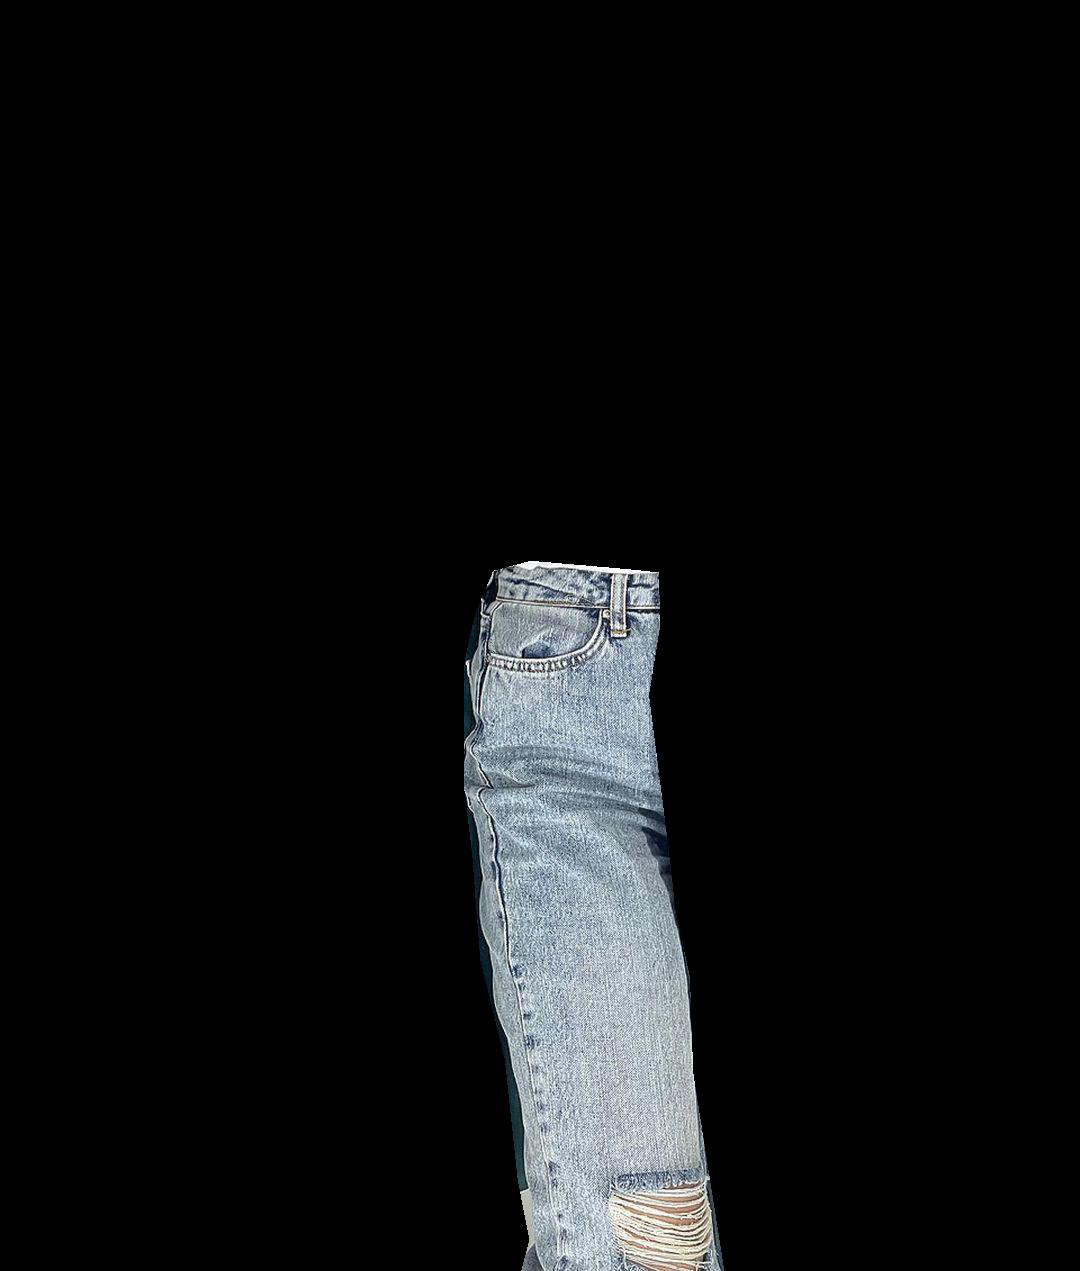

In [ ]:
image

In [ ]:
# prepare image for the model
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_caption)

ÿ±ÿßÿ≥ÿ™Ÿá, ÿ≤ÿßŸæ ÿØÿßÿ±, ÿ¨€åŸÜ, ÿßÿ≥Ÿæÿ±ÿ™, Ÿà ÿ®€åÿ≥€å⁄© Ÿà ÿ±Ÿàÿ≤ŸÖÿ±Ÿá, ÿ≤ŸÜÿßŸÜŸá


## Load from the Hub

Once trained you can push the model and processor on the Hub to use them later. 
Meanwhile you can play with the model that we have fine-tuned!

In [ ]:
from transformers import BlipForConditionalGeneration, AutoProcessor

model = BlipForConditionalGeneration.from_pretrained("ybelkada/blip-image-captioning-base-football-finetuned").to(device)
processor = AutoProcessor.from_pretrained("ybelkada/blip-image-captioning-base-football-finetuned")

Downloading:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/990M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/431 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/488 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/712k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Let's check the results on our train dataset!

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18, 14))

# prepare image for the model
for i, example in enumerate(dataset):
  image = example["image"]
  inputs = processor(images=image, return_tensors="pt").to(device)
  pixel_values = inputs.pixel_values

  generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
  generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  fig.add_subplot(2, 3, i+1)
  plt.imshow(image)
  plt.axis("off")
  plt.title(f"Generated caption: {generated_caption}")